<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.8

Name: Juan Manuel G.G

Date: February 2021

### 1. Process description 

A jacketed vessel is used to cool a process stream as
shown in Fig. 1. The following information is
available:

### 2. Assumptions

*(i)* The volume of the liquid in the tank V and the volume of coolant in the jacket $V_J$ remain constant. Volumetric flow rate $q_F$ is constant, but $q_J$ varies with time. 

*(ii)* Heat losses from the jacketed vessel are negligible

*(iii)*  Both the tank contents and the jacket contents are well mixed and have significant thermal capacitances

*(iv)* The overall heat transfer coefficient for transfer between the tank liquid and the coolant varies with coolant flow rate:

$$U = K q_J^{0.8}$$

*(v)* Constant liquid and cooler densities

*(vi)* Constant liquid and cooler specific heat coefficient 

where 

$U[=] Btu/h ft^2 °F$

$q_J [=] ft^3/h$

$K = constant$


### 3. Process scheme 

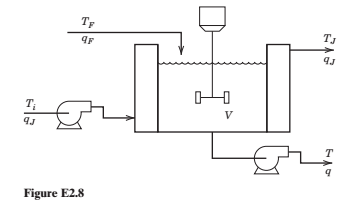

Figure 1. Scheme of the process 

### 4. Analysis 



#### Establish the model 

Mass balance in the tank

$$
\frac{dm}{dt} = \rho q_F - \rho q = 0 \hspace{1cm} \rightarrow \hspace{1cm} q_F = q
$$

Energy balance in the tank 

$$
\frac{dH}{dt} = \rho q \hat{H}_F - \rho q \hat{H} - UA(T - T_J)
$$

$$
\rho V C_p \frac{dT}{dt} = \rho q C_p (T_F - T) - k q_J^{0.8} A(T - T_J) \tag{1}
$$

Energy balance for coolant

$$
\frac{dH_J}{dt} = \rho_c q_J \hat{H}_i - \rho_c q_J \hat{H}_J + UA(T - T_J)  
$$

$$
\rho_c C_c V_c \frac{dT_J}{dt} = \rho_c q_J C_c (T_i - T_J) + k q_J ^{0.8}A(T - T_J)  \tag{2}
$$


#### Steady state 

Equation (1) and (2) to zero we get 

$$
\rho q C_p (T_F - T) - k q_J^{0.8} A(T - T_J) = 0 \tag{3}
$$

$$
\rho_c q_J C_c (T_i - T_J) + k q_J ^{0.8}A(T - T_J) = 0 \tag{4}
$$

In [ ]:
import sympy as sp 

In [ ]:
# crear símbolos 
rho, q, Cp, Tf, T, k, qj, A, Tj, rho_c, Cc, Ti, UA = sp.symbols("rho, q, Cp, Tf, T, k, qj, A, Tj, rho_c, Cc, Ti, UA")

In [ ]:
# create equations 
eq1 = sp. Eq(rho*q*Cp*(Tf-T) - UA*(T-Tj), 0)
eq2 = sp. Eq(rho_c*qj*Cc*(Ti-Tj) + UA*(T-Tj), 0)

In [ ]:
sp.solve([eq1,eq2],[T, Tj])

{T: -(Cc*Ti*UA*qj*rho_c + Cp*Tf*q*rho*(Cc*qj*rho_c + UA))/(UA**2 - (Cc*qj*rho_c + UA)*(Cp*q*rho + UA)),
 Tj: -(Cc*Ti*qj*rho_c*(Cp*q*rho + UA) + Cp*Tf*UA*q*rho)/(UA**2 - (Cc*qj*rho_c + UA)*(Cp*q*rho + UA))}

#### Degrees of freedon analysis 

state variables: T, Tj

inputs: q, Ti, Tf, qj

parameters: Vc, V, k, A, $\rho_c$, $\rho$ 

#### Simulate the model 


In [ ]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [ ]:
# write model 
def cooler(s,t,u,p):

    # state variables 
    T = s[0]
    Tj = s[1]

    # input variables 
    q = u[0] 
    Ti = u[1] 
    Tf = u[2] 
    qj = u[3]

    # parameters
    V = p[0] 
    Vc = p[1] 
    k = p[2] 
    A = p[3] 
    rho = p[4] 
    rho_c = p[5]

    # heat flow
    Q_dot = k*qj**0.8*A*(T - Tj)

    # energy balance for the tank 
    dTdt = q/V*(Tf - Tj) - Q_dot

    # energy balance in the coolant
    dTjdt = qj/Vc*(Ti - Tj) + Q_dot

    return [dTdt, dTjdt]

In [ ]:
# establish parameters 
V = 0.5 # m3
Vc = 0.1 # m3
k = 10 
A = 0.5 # m2
rho = 1000 # kg/m3
rho_c = 850 # kg/m3
p = [V, Vc, k, A, rho, rho_c]

In [ ]:
# establish inputs
q = 0.5 # m3/s
Ti = 220 # K
Tf = 330 # K
qj = 0.01 # m3/s
u = [q, Ti, Tf, qj]

In [ ]:
# set initial conditions 
s = [270, 200]

In [ ]:
# set integration time 
time = np.linspace(0,100,100)

In [ ]:
out = odeint(cooler, s, time, args= (u, p))

In [ ]:
T = out[:,0]
Tj = out[:,1]

Text(0, 0.5, 'temperature (K)')

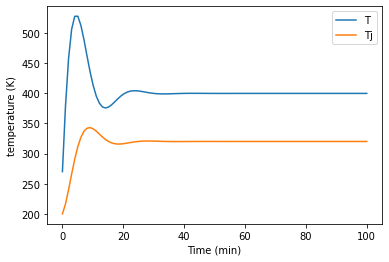

In [ ]:
plt.plot(time, T, time, Tj)
plt.legend(["T","Tj"])
plt.xlabel("Time (min)")
plt.ylabel("temperature (K)")